# Porout por consumo 
* (Script Completo con Modelos reentrenados)

In [1]:
import pandas as pd
import numpy as np
import gc
from datetime import datetime
from itertools import compress
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import load,dump
import re
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(suppress=True)

In [4]:
# Medir Faltantes
df07 = pd.read_csv(f'GAAVANZADA.TBL_PORTOUT_PREPAGO_202107.csv', sep='|', decimal='.')
df06 = pd.read_csv(f'GAAVANZADA.TBL_PORTOUT_PREPAGO_202106.csv', sep='|', decimal='.')
df05 = pd.read_csv(f'GAAVANZADA.TBL_PORTOUT_PREPAGO_202105.csv', sep='|', decimal='.')

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (2,5,63,67,70) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (2,5,67) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (2,67,70) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df07['file']='df07'
df06['file']='df06'
df05['file']='df05'

In [21]:
df2['POROUT'].unique()

array([1, 0], dtype=int64)

In [23]:
df2[df2['POROUT']==1].isnull().sum()

CO_ID                                        0
CUSTOMER_ID                                  0
CUSTCODE                                     0
TELE_NUMB                                    0
TELE_NUMB_COMPLETO                           0
IDENTIFICACION                               5
FECHA_ACTIVACION_BSCS                        0
POROUT                                       0
REGION_SIT                               63148
MUNICIPIO_SIT                            63148
DEPTO_SIT                                63148
REGION_SIT_NOCHE                         63148
MUNICIPIO_SIT_NOCHE                      63148
DEPTO_SIT_NOCHE                          63148
REGION_SIT_M1                            90102
MUNICIPIO_SIT_M1                         90102
DEPTO_SIT_M1                             90102
REGION_SIT_NOCHE_M1                      90102
MUNICIPIO_SIT_NOCHE_M1                   90102
DEPTO_SIT_NOCHE_M1                       90102
PROM_SEGUNDOS_MA                         25151
PROM_SEGUNDOS

In [24]:
df2[df2['POROUT']==1].isnull().sum()/len(df2[df2['POROUT']==1])

CO_ID                                  0.000
CUSTOMER_ID                            0.000
CUSTCODE                               0.000
TELE_NUMB                              0.000
TELE_NUMB_COMPLETO                     0.000
IDENTIFICACION                         0.000
FECHA_ACTIVACION_BSCS                  0.000
POROUT                                 0.000
REGION_SIT                             0.207
MUNICIPIO_SIT                          0.207
DEPTO_SIT                              0.207
REGION_SIT_NOCHE                       0.207
MUNICIPIO_SIT_NOCHE                    0.207
DEPTO_SIT_NOCHE                        0.207
REGION_SIT_M1                          0.296
MUNICIPIO_SIT_M1                       0.296
DEPTO_SIT_M1                           0.296
REGION_SIT_NOCHE_M1                    0.296
MUNICIPIO_SIT_NOCHE_M1                 0.296
DEPTO_SIT_NOCHE_M1                     0.296
PROM_SEGUNDOS_MA                       0.083
PROM_SEGUNDOS_M1                       0.129
PROM_SEGUN

In [13]:
df2=df05
df2=df2.append(df06)
df2=df2.append(df07)

In [12]:
del df
gc.collect()

NameError: name 'df' is not defined

In [ ]:
del df05
del df06
del df07
gc.collect()

In [ ]:
pd.pivot_table(df[['POROUT','file','CO_ID']], columns='POROUT', index='file', aggfunc='count')

In [ ]:
df2.isnull().sum()

### Unificación CO_ID

In [20]:
maxFile=df2.groupby(['CO_ID'])['file'].max().to_frame()

In [471]:
df2 = maxFile.merge(df, how='left', left_on=["CO_ID", "file"], right_on=["CO_ID", "file"])

In [473]:
len(df2)

8262137

In [474]:
df2.POROUT.sum()/len(df2)

0.02525968765707952

In [ ]:
# cambiar df2 por df

### Calculo faltantes por categoría

In [23]:
varGeo=['REGION_SIT', 'MUNICIPIO_SIT','DEPTO_SIT', 'REGION_SIT_NOCHE', 'MUNICIPIO_SIT_NOCHE','DEPTO_SIT_NOCHE', 'REGION_SIT_M1', 'MUNICIPIO_SIT_M1',
       'DEPTO_SIT_M1', 'REGION_SIT_NOCHE_M1', 'MUNICIPIO_SIT_NOCHE_M1','DEPTO_SIT_NOCHE_M1']
varRazones=['RAZON1_MA', 'RAZON1_M1','RAZON2_M2', 'RAZON3_M3', 'RAZON3_M4']
varHabitos=[ 'PROM_SEGUNDOS_MA', 'PROM_SEGUNDOS_M1','PROM_SEGUNDOS_M2', 'PROM_SEGUNDOS_M3', 'PROM_SEGUNDOS_M4',
              'PROM_DATOS_MA', 'PROM_DATOS_M1', 'PROM_DATOS_M2', 'PROM_DATOS_M3','PROM_DATOS_M4',
             'PROMEDIO_SALDO_MES', 'PROMEDIO_SALDO_M1', 'PROMEDIO_SALDO_M2']
varPaq=['NOMBRE_PAQ_MAS_COMPRADO_MES','CANT_PAQ_MAS_COMPRADO_MES','VLR_PAQ_MAS_COMPRADO_MES',
        'NOMBRE_PAQ_MAS_COMPRADO_MES_ANTERIOR','CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR','VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR']
varConsumo=['TOTAL_MB_WHATSAPP','TOTAL_MB_TWITTER_Y_FACEBOOK', 'TOTAL_MB_SNAPCHAT','TOTAL_MB_INSTAGRAM', 'TOTAL_MB_YOUTUBE', 'TOTAL_MB_GOOGLE_MAPS','CONSUMO_TOTAL_MB']

In [ ]:
df.drop(columns=[falt_Geo], inplace=True)

In [53]:
df['falt_Geo']=np.where(df[varGeo].isnull().sum(axis=1)==len(varGeo),1,0)

In [29]:
df['falt_Raz']=np.where(df[varRazones].isnull().sum(axis=1)==len(varRazones),1,0)
df['falt_Hab']=np.where(df[varHabitos].isnull().sum(axis=1)==len(varHabitos),1,0)
df['falt_Paq']=np.where(df[varPaq].isnull().sum(axis=1)==len(varPaq),1,0)
df['falt_Con']=np.where(df[varConsumo].isnull().sum(axis=1)==len(varConsumo),1,0)

In [54]:
resFaltantes=df.filter(regex='^falt').sum().to_frame()

In [55]:
resFaltantes.columns=['faltantes']

In [56]:
resFaltantes['indiceFaltantes']=resFaltantes['faltantes']/len(df)

<AxesSubplot:>

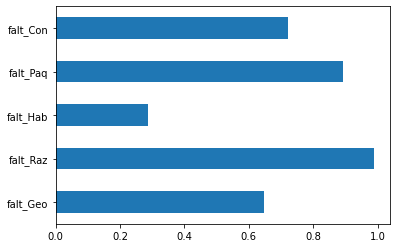

In [57]:
resFaltantes['indiceFaltantes'].plot.barh()

* Dado que se requiere enfocar en consumo se filtrar los los registros que tienen información de consumo

In [58]:
colFaltantes=list(df.filter(regex='^falt').columns)
colFaltantes

['falt_Geo', 'falt_Raz', 'falt_Hab', 'falt_Paq', 'falt_Con']

In [113]:
res_fal_por=df[colFaltantes+['POROUT','CO_ID']].groupby(colFaltantes+['POROUT']).count().reset_index()

In [114]:
res_fal_por=pd.melt(res_fal_por, id_vars=['POROUT','CO_ID'], var_name='variable', value_name='faltante')

In [115]:
res_fal_por=res_fal_por.groupby(['variable','faltante','POROUT']).sum()

In [116]:
res_fal_por.reset_index(inplace=True)

In [117]:
res_fal_por=pd.pivot_table(res_fal_por,columns='POROUT',index=['variable','faltante'], values='CO_ID', aggfunc='sum')

In [126]:
res_fal_por

0  porout
variable faltante                 
falt_Con 0         2059979  243132
         1         5897412   61628
falt_Geo 0         2647154  261877
         1         5310237   42883
falt_Hab 0         5595242  296081
         1         2362149    8679
falt_Paq 0          792057   96849
         1         7165334  207911
falt_Raz 0           56473   24005
         1         7900918  280755

In [124]:
res_fal_por.columns=['0','porout']

<AxesSubplot:xlabel='variable,faltante'>

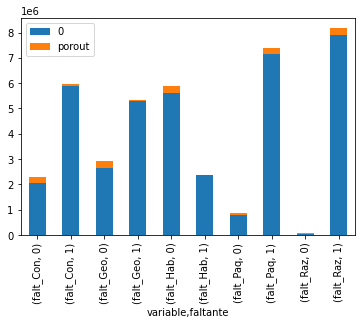

In [125]:
res_fal_por.plot(kind='bar', stacked=True)
#res_fal_por[res_fal_por['faltante']==0][[0,1]].plot(kind='bar', stacked=True)

In [131]:
res_fal_por['% 0']=res_fal_por['0']/(res_fal_por['0']+res_fal_por['porout'])
res_fal_por['% porout']=res_fal_por['porout']/(res_fal_por['0']+res_fal_por['porout'])

<AxesSubplot:xlabel='variable,faltante'>

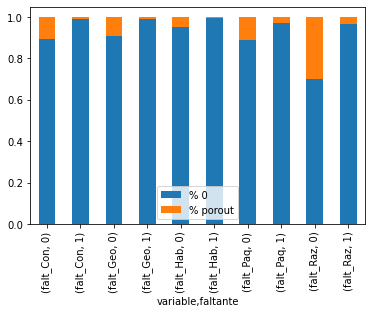

In [132]:
res_fal_por[['% 0','% porout']].plot(kind='bar', stacked=True)

In [134]:
res_fal_por

0  porout   % 0  % porout
variable faltante                                 
falt_Con 0         2059979  243132 0.894     0.106
         1         5897412   61628 0.990     0.010
falt_Geo 0         2647154  261877 0.910     0.090
         1         5310237   42883 0.992     0.008
falt_Hab 0         5595242  296081 0.950     0.050
         1         2362149    8679 0.996     0.004
falt_Paq 0          792057   96849 0.891     0.109
         1         7165334  207911 0.972     0.028
falt_Raz 0           56473   24005 0.702     0.298
         1         7900918  280755 0.966     0.034

## Calculo variables necesarias

In [141]:
varMedidas=['PROM_SEGUNDOS','PROM_DATOS','PROMEDIO_SALDO']

In [143]:
for group in varMedidas:
    df['avg_'+group]=df.filter(regex='^'+group,axis=1).mean(axis=1)

In [144]:
varConsumo=['TOTAL_MB_WHATSAPP',
 'TOTAL_MB_TWITTER_Y_FACEBOOK',
 'TOTAL_MB_SNAPCHAT',
 'TOTAL_MB_INSTAGRAM',
 'TOTAL_MB_YOUTUBE',
 'TOTAL_MB_GOOGLE_MAPS']

In [145]:
for col in varConsumo:
    df['part_'+col]=np.where(df['CONSUMO_TOTAL_MB']<=0,0, df[col]/df['CONSUMO_TOTAL_MB'])

## Calcular Edades a partir de modelos

### Modelo Consumo

In [288]:
## Carga modelo de Edades a partir del consumo
modelCel_from_Con=load('modeloPred_edad_from_consumoV3.pkl')

In [136]:
#Seleccionar los que tienen consumo
#varConsumo
df=df[df['falt_Con']==0]

In [156]:
len(df)

2303111

In [157]:
col_X=['part_TOTAL_MB_INSTAGRAM', 'part_TOTAL_MB_TWITTER_Y_FACEBOOK',
       'part_TOTAL_MB_WHATSAPP', 'part_TOTAL_MB_YOUTUBE', 'CONSUMO_TOTAL_MB',
       'avg_PROM_DATOS', 'avg_PROMEDIO_SALDO']

In [158]:
X_input=df[col_X]

In [289]:
df['Edad_con']= modelCel_from_Con.predict(X_input)

### Modelo Identificaciones

In [270]:
modelo_H1=load(f'11.Edad/modeloXGB_H1.pkl')
modelo_H2=load(f'11.Edad/modeloXGB_H2.pkl')
modelo_M1=load(f'11.Edad/modeloXGB_M1.pkl')
modelo_act2004=load(f'11.Edad/modeloXGB_act2004.pkl')

In [245]:
def limpiarIdentificacion(dni):
    #print(type(dni))
    #print(isinstance(dni, float))
    if not isinstance(dni, float):
        if any( (c.isalpha()) for c in dni):
            return 0
        else:
            if dni[-2:] == '.0':
                dni=dni[:-2]
            dni=str(dni).replace('.000','')
            dni = re.sub(r'\W', ' ', str(dni))
            dni=dni.replace('.','')
            dni=dni.replace(' ','')
    return int(dni)

def tipoDocumento(dni):    
    #text='9005514169.0'
    ##pos=dni.find('.')
    ##if pos != -1:
    ##    dni=dni[0:pos]  
    dni=str(dni)
    longitud=len(dni)
    inicial=dni[0]
    respuesta="desconocido"
    if (longitud == 9 or longitud==10) and (inicial=='9' or inicial=='8'):
        respuesta="NIT"
    elif (longitud == 7 or longitud==8):
        respuesta="cedula"
    elif (longitud == 10) and (inicial=='1'):
        respuesta="cedula"
    elif longitud<=6:
        respuesta="sin id"
    return respuesta

In [213]:
df['IDENTIFICACION'].isnull().sum()

0

In [162]:
df['IDENTIFICACION'].fillna(0, inplace=True)

In [235]:
df['id_limp']=df['IDENTIFICACION'].apply(limpiarIdentificacion)

In [237]:
df.dtypes['id_limp']

dtype('int64')

In [239]:
#df['id_limp']=df[['id_limp']].applymap(str)

In [246]:
df['tipo_id']=df['id_limp'].apply(tipoDocumento)

In [247]:
df[['tipo_id']].value_counts()

tipo_id    
NIT            1888240
cedula          384598
sin id           18932
desconocido      11341
dtype: int64

<AxesSubplot:ylabel='tipo_id'>

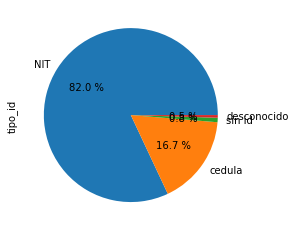

In [248]:
df['tipo_id'].value_counts().plot(kind="pie",autopct="%0.1f %%")

In [249]:
# Revisar solo co_id validos para el modelo cédulas validas con menos de 2 identificaciones por usario

In [250]:
resCedulas=df[df['tipo_id']=='cedula']['id_limp'].value_counts().to_frame()

In [251]:
resCedulas.head()

,id_limp
79170668,8452
90801837,6544
71314521,4473
19295300,2861
26258666,2579


In [252]:
resCedulas['selContID']=np.where(resCedulas['id_limp']<=1,'1 usuar','>1 usuar')

In [253]:
resCelVal=resCedulas[['selContID','id_limp']].groupby('selContID').sum()
resCelVal

,id_limp
selContID,
1 usuar,144562
>1 usuar,240036


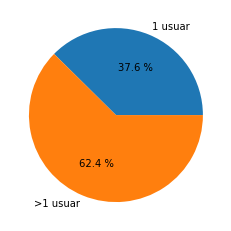

In [254]:
#resCelVal.plot(kind="pie")
plt.pie(resCelVal['id_limp'], labels=resCelVal.index, autopct="%0.1f %%");

In [255]:
df.drop(columns=['selContID'],inplace=True)

In [256]:
df=df.merge(resCedulas['selContID'], left_on='id_limp', right_index=True, how='left')

In [257]:
df['selContID'].value_counts()

>1 usuar    240036
1 usuar     144562
Name: selContID, dtype: int64

In [258]:
df['longitud_id']=df['id_limp'].map(str).apply(len)

In [263]:
df['num_ini_id']=df['id_limp'].map(str).str[:3]

In [259]:
#df['id_limp']=df['id_limp'].astype(int)

In [260]:
df['cat_id']=np.where(
                            df['longitud_id']==1,'rev',np.where(
                                df['longitud_id']==10,'act2004', np.where(
                                    df['id_limp']<20000000,'H1', np.where(
                                        df['id_limp']<70000000,'M1', np.where(
                                            df['id_limp']<100000000,'H2','rev')
                                        )
                                    )
                            )
                )

In [261]:
df['cat_id'].value_counts()

rev        1854375
act2004     187076
M1          112739
H2           77971
H1           70950
Name: cat_id, dtype: int64

In [264]:
# solo los que tienen cedulas válidas

In [265]:
dfCedulas=df[df['selContID']=='1 usuar']

In [266]:
len(dfCedulas)

144562

In [268]:
df_H1=dfCedulas[dfCedulas['cat_id']=='H1']
df_H2=dfCedulas[dfCedulas['cat_id']=='H2']
df_M1=dfCedulas[dfCedulas['cat_id']=='M1']
df_act2004=dfCedulas[dfCedulas['cat_id']=='act2004']

In [271]:
df_H1['Edad_ced']=modelo_H1.predict(df_H1[['id_limp','longitud_id','num_ini_id']])
df_H2['Edad_ced']=modelo_H2.predict(df_H2[['id_limp','longitud_id','num_ini_id']])
df_M1['Edad_ced']=modelo_M1.predict(df_M1[['id_limp','longitud_id','num_ini_id']])
df_act2004['Edad_ced']=modelo_act2004.predict(df_act2004[['id_limp','longitud_id','num_ini_id']])

<ipython-input-271-e6263979c239>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_H1['Edad_ced']=modelo_H1.predict(df_H1[['id_limp','longitud_id','num_ini_id']])
<ipython-input-271-e6263979c239>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_H2['Edad_ced']=modelo_H2.predict(df_H2[['id_limp','longitud_id','num_ini_id']])
<ipython-input-271-e6263979c239>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [272]:
df_cedulaFinal=df_H1.copy()
df_cedulaFinal=df_cedulaFinal.append(df_H2)
df_cedulaFinal=df_cedulaFinal.append(df_M1)
df_cedulaFinal=df_cedulaFinal.append(df_act2004)

In [273]:
df_cedulaFinal=df_cedulaFinal.drop_duplicates()

In [274]:
len(df_cedulaFinal)

144562

In [276]:
df_cedulaFinal.sample(10)

,CO_ID,file,CUSTOMER_ID,CUSTCODE,TELE_NUMB,TELE_NUMB_COMPLETO,IDENTIFICACION,FECHA_ACTIVACION_BSCS,POROUT,REGION_SIT,MUNICIPIO_SIT,DEPTO_SIT,REGION_SIT_NOCHE,MUNICIPIO_SIT_NOCHE,DEPTO_SIT_NOCHE,REGION_SIT_M1,MUNICIPIO_SIT_M1,DEPTO_SIT_M1,REGION_SIT_NOCHE_M1,MUNICIPIO_SIT_NOCHE_M1,DEPTO_SIT_NOCHE_M1,PROM_SEGUNDOS_MA,PROM_SEGUNDOS_M1,PROM_SEGUNDOS_M2,PROM_SEGUNDOS_M3,PROM_SEGUNDOS_M4,PROM_DATOS_MA,PROM_DATOS_M1,PROM_DATOS_M2,PROM_DATOS_M3,PROM_DATOS_M4,CANT_SMS_MA,CANT_SMS_M1,CANT_SMS_M2,CANT_SMS_M3,CANT_SMS_M4,TOTAL_MB_WHATSAPP,TOTAL_MB_TWITTER_Y_FACEBOOK,TOTAL_MB_SNAPCHAT,TOTAL_MB_INSTAGRAM,TOTAL_MB_WAZE,TOTAL_MB_YOUTUBE,TOTAL_MB_SPOTIFY,TOTAL_MB_GOOGLE_MAPS,CONSUMO_TOTAL_MB,CANT_PAQ_MAS_COMPRADO_MES,VLR_PAQ_MAS_COMPRADO_MES,NOMBRE_PAQ_MAS_COMPRADO_MES,PROMEDIO_SALDO_MES,PROMEDIO_SALDO_M1,PROMEDIO_SALDO_M2,ANTIGUEDAD_USUARIO,TOTAL_VALOR_DE_ADELANTA_SALDO,ES_SMARTPHONE,CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR,VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR,NOMBRE_PAQ_MAS_COMPRADO_MES_ANTERIOR,RAZON1_MA,RAZON2_MA,RAZON3_MA,RAZON1_M1,RAZON2_M1,RAZON3_M1,RAZON1_M2,RAZON2_M2,RAZON3_M2,RAZON1_M3,RAZON2_M3,RAZON3_M3,RAZON1_M4,RAZON2_M4,RAZON3_M4,DESACTIVACION_PORTACION_M1,DESACTIVACION_PORTACION_M2,DESACTIVACION_PORTACION_M3,DESACTIVACION_PORTACION_M4,ACTIVACION_PORTACION_M1,ACTIVACION_PORTACION_M2,ACTIVACION_PORTACION_M3,ACTIVACION_PORTACION_M4,falt_Geo,falt_Raz,falt_Hab,falt_Paq,falt_Con,avg_PROM_SEGUNDOS,avg_PROM_DATOS,avg_PROMEDIO_SALDO,part_TOTAL_MB_WHATSAPP,part_TOTAL_MB_TWITTER_Y_FACEBOOK,part_TOTAL_MB_SNAPCHAT,part_TOTAL_MB_INSTAGRAM,part_TOTAL_MB_YOUTUBE,part_TOTAL_MB_GOOGLE_MAPS,Edad_con,tipo_id,id_limp,longitud_id,selContID,cat_id,num_ini_id,Edad_ced
3611424,319123198,df06,328629226,2.231310500,3145243675,573145243675,43888907,2020-07-14 23:52:23.0,1,NorOccidente,Nechi,Antioquia,NorOccidente,Nechi,Antioquia,NaN,NaN,NaN,NaN,NaN,NaN,169.380,217.608,247.784,274.706,NaN,4518947.973,4627837.928,4589361.186,5971771.379,NaN,NaN,NaN,NaN,NaN,NaN,419.000,1072.000,58.000,0.000,0.000,7.000,0.000,0.000,2391.000,NaN,NaN,NaN,2.000,9.742,18.333,313.000,0.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0,1,0,227.370,4926979.616,10.025,0.175,0.448,0.024,0.000,0.003,0.000,38.080,cedula,43888907,8,1 usuar,M1,438,44.124
4137294,326102071,df05,335611778,2.237454246,3134380309,573134380309,1069723912,2020-09-29 22:56:26.0,0,Centro,Bogota D C,Cundinamarca,Centro,Bogota D C,Cundinamarca,Centro,Bogota D C,Cundinamarca,Centro,Bogota D C,Cundinamarca,444.683,295.863,412.137,456.190,378.595,1461493.876,2624670.415,2050386.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.000,1.000,0.000,0.000,0.000,10.000,0.000,0.000,248.000,NaN,NaN,NaN,349.548,0.000,0.000,191.000,0.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0,1,0,397.494,2045516.889,116.516,0.169,0.004,0.000,0.000,0.040,0.000,42.297,cedula,1069723912,10,1 usuar,act2004,106,32.707
3649370,319628081,df07,329134301,2.232,3147775675,573147775675,9297863,2020-07-17 19:16:43.0,1,Costa,Turbaco,Bolivar,Costa,Turbaco,Bolivar,NaN,NaN,NaN,NaN,NaN,NaN,219.971,65.312,64.167,NaN,NaN,304958.074,173280.561,36132.406,213866.533,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,130.000,NaN,NaN,NaN,0.000,NaN,NaN,287.000,0.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0,1,0,116.483,182059.394,0.000,0.000,0.000,0.000,0.000,0.000,0.000,42.128,cedula,9297863,7,1 usuar,H1,929,38.702
6447550,341700035,df06,351218166,2.251,3202012718,573202012718,1105691551,2021-03-05 04:04:33.0,1,SurOccidente,Espinal,Tolima,SurOccidente,Espinal,Tolima,SurOccidente,Espinal,Tolima,SurOccidente,Espinal,Tolima,369.034,306.047,477.102,669.211,NaN,3070357.938,2805438.984,5289527.427,10693389.320,NaN,NaN,NaN,NaN,NaN,NaN,460.000,1537.000,4.000,0.000,0.000,373.000,0.000,0.000,3479.000,NaN,NaN,NaN,0.520,0.520,0.520,NaN,0.000,1.000,NaN,NaN,NaN,COMERCIAL - Condiciones de venta,NaN,NaN,NaN,NaN,NaN,NaN

In [277]:
len(df)

2303111

In [281]:
df=df.merge(df_cedulaFinal[['CO_ID','Edad_ced']] , left_on='CO_ID',right_on='CO_ID',how='left')

In [291]:
df['EDAD']=np.where(df['Edad_ced'].isnull(),df['Edad_con'],df['Edad_ced'])

<AxesSubplot:>

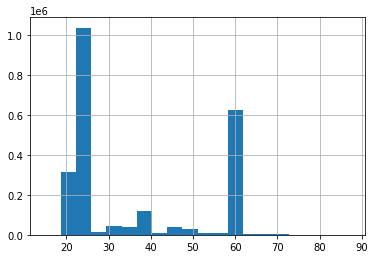

In [292]:
df['EDAD'].hist(bins=20)

<AxesSubplot:>

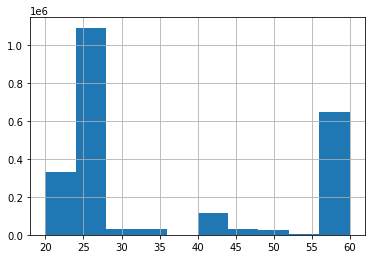

In [293]:
df['Edad_con'].hist()

<AxesSubplot:>

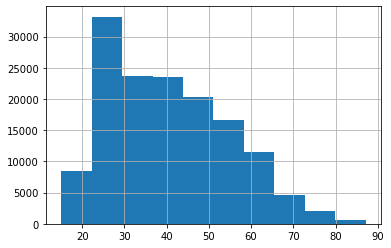

In [294]:
df['Edad_ced'].hist()

In [287]:
df['avg_PROM_DATOS'].isnull().sum()

0

###  Arboles
* Eliminar datos sin consumo

In [296]:
colSerCon=['TOTAL_MB_WHATSAPP','TOTAL_MB_TWITTER_Y_FACEBOOK','TOTAL_MB_SNAPCHAT',
 'TOTAL_MB_INSTAGRAM','TOTAL_MB_YOUTUBE','TOTAL_MB_GOOGLE_MAPS']

In [297]:
df['totalConsumo']=df[colSerCon].sum(axis=1)

In [299]:
df['ws_p']=np.where(df['totalConsumo']==0,0,df['TOTAL_MB_WHATSAPP']/df['totalConsumo'])
df['tyf_p']=np.where(df['totalConsumo']==0,0,df['TOTAL_MB_TWITTER_Y_FACEBOOK']/df['totalConsumo'])
df['sn_p']=np.where(df['totalConsumo']==0,0,df['TOTAL_MB_SNAPCHAT']/df['totalConsumo'])
df['inst_p']=np.where(df['totalConsumo']==0,0,df['TOTAL_MB_INSTAGRAM']/df['totalConsumo'])
df['y_p']=np.where(df['totalConsumo']==0,0,df['TOTAL_MB_YOUTUBE']/df['totalConsumo'])
df['gm_p']=np.where(df['totalConsumo']==0,0,df['TOTAL_MB_GOOGLE_MAPS']/df['totalConsumo'])

In [324]:
df['cat_tot_cons']=np.where(df['totalConsumo']==0,'sinConServ','conConServ')

In [325]:
res_total_consumo=df.groupby('cat_tot_cons')['POROUT'].agg(['count','sum'])
res_total_consumo.head(10)

,count,sum
cat_tot_cons,,
conConServ,1741674,208699
sinConServ,561437,34433


In [326]:
res_total_consumo['indPor']=res_total_consumo['sum']/res_total_consumo['count']
res_total_consumo.reset_index(inplace=True)
res_total_consumo.head(10)

,cat_tot_cons,count,sum,indPor
0,conConServ,1741674,208699,0.120
1,sinConServ,561437,34433,0.061


In [319]:
df[df['totalConsumo']==3].sample(10)

,CO_ID,file,CUSTOMER_ID,CUSTCODE,TELE_NUMB,TELE_NUMB_COMPLETO,IDENTIFICACION,FECHA_ACTIVACION_BSCS,POROUT,REGION_SIT,MUNICIPIO_SIT,DEPTO_SIT,REGION_SIT_NOCHE,MUNICIPIO_SIT_NOCHE,DEPTO_SIT_NOCHE,REGION_SIT_M1,MUNICIPIO_SIT_M1,DEPTO_SIT_M1,REGION_SIT_NOCHE_M1,MUNICIPIO_SIT_NOCHE_M1,DEPTO_SIT_NOCHE_M1,PROM_SEGUNDOS_MA,PROM_SEGUNDOS_M1,PROM_SEGUNDOS_M2,PROM_SEGUNDOS_M3,PROM_SEGUNDOS_M4,PROM_DATOS_MA,PROM_DATOS_M1,PROM_DATOS_M2,PROM_DATOS_M3,PROM_DATOS_M4,CANT_SMS_MA,CANT_SMS_M1,CANT_SMS_M2,CANT_SMS_M3,CANT_SMS_M4,TOTAL_MB_WHATSAPP,TOTAL_MB_TWITTER_Y_FACEBOOK,TOTAL_MB_SNAPCHAT,TOTAL_MB_INSTAGRAM,TOTAL_MB_WAZE,TOTAL_MB_YOUTUBE,TOTAL_MB_SPOTIFY,TOTAL_MB_GOOGLE_MAPS,CONSUMO_TOTAL_MB,CANT_PAQ_MAS_COMPRADO_MES,VLR_PAQ_MAS_COMPRADO_MES,NOMBRE_PAQ_MAS_COMPRADO_MES,PROMEDIO_SALDO_MES,PROMEDIO_SALDO_M1,PROMEDIO_SALDO_M2,ANTIGUEDAD_USUARIO,TOTAL_VALOR_DE_ADELANTA_SALDO,ES_SMARTPHONE,CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR,VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR,NOMBRE_PAQ_MAS_COMPRADO_MES_ANTERIOR,RAZON1_MA,RAZON2_MA,RAZON3_MA,RAZON1_M1,RAZON2_M1,RAZON3_M1,RAZON1_M2,RAZON2_M2,RAZON3_M2,RAZON1_M3,RAZON2_M3,RAZON3_M3,RAZON1_M4,RAZON2_M4,RAZON3_M4,DESACTIVACION_PORTACION_M1,DESACTIVACION_PORTACION_M2,DESACTIVACION_PORTACION_M3,DESACTIVACION_PORTACION_M4,ACTIVACION_PORTACION_M1,ACTIVACION_PORTACION_M2,ACTIVACION_PORTACION_M3,ACTIVACION_PORTACION_M4,falt_Geo,falt_Raz,falt_Hab,falt_Paq,falt_Con,avg_PROM_SEGUNDOS,avg_PROM_DATOS,avg_PROMEDIO_SALDO,part_TOTAL_MB_WHATSAPP,part_TOTAL_MB_TWITTER_Y_FACEBOOK,part_TOTAL_MB_SNAPCHAT,part_TOTAL_MB_INSTAGRAM,part_TOTAL_MB_YOUTUBE,part_TOTAL_MB_GOOGLE_MAPS,Edad_con,tipo_id,id_limp,longitud_id,selContID,cat_id,num_ini_id,Edad_ced,EDAD,totalConsumo,ws_p,tyf_p,sn_p,inst_p,y_p,gm_p
1815752,333931268,df05,343445769,2.244375054,3234664101,573234664101,1067842897,2020-12-18 16:32:28.0,0,Costa,Achi,Bolivar,Costa,Achi,Bolivar,Costa,Achi,Bolivar,Costa,Achi,Bolivar,212.429,138.250,NaN,73.778,228.983,141374.381,179442.825,50366.108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,14.000,1.000,-4000.000,Navegacion 120MB + ChatWhatsapp Facebook Twitt...,64.516,66.667,NaN,164.000,0.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,163.360,123727.772,65.591,0.000,0.214,0.000,0.000,0.000,0.000,25.000,cedula,1067842897,10,>1 usuar,act2004,106,NaN,25.000,3.000,0.000,1.000,0.000,0.000,0.000,0.000
422917,250349046,df05,259778680,2.170217095,3114120384,573114120384,900766382,2018-01-31 09:16:10.0,0,Costa,Monteria,Cordoba,Costa,Monteria,Cordoba,Costa,Monteria,Cordoba,Costa,Monteria,Cordoba,155.118,192.755,294.296,381.878,252.507,436140.400,250741.909,384523.795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,2.000,0.000,0.000,0.000,1.000,0.000,0.000,12.000,NaN,NaN,NaN,0.000,0.000,0.000,1122.000,0.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0,1,0,255.311,357135.368,0.000,0.000,0.167,0.000,0.000,0.083,0.000,60.000,NIT,900766382,9,NaN,rev,900,NaN,60.000,3.000,0.000,0.667,0.000,0.000,0.333,0.000
685062,270350477,df05,279825736,2.187933943,3112367432,573112367432,830513238,2018-11-08 19:33:43.0,0,NorOccidente,Quimbaya,Quindio,NorOccidente,Quimbaya,Quindio,NaN,NaN,NaN,NaN,NaN,NaN,178.690,226.520,149.567,90.947,165.053,125677.598,0.000,14.833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,12.000,NaN,NaN,NaN,0.000,NaN,2.106,916.000,0.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0,1,0,162.155,41897.477,1.053,0.083,0.083,0.000,0.000,0.083,0.000,60.000,NIT,830513238,9,NaN,rev,830,NaN,60.000,3.000,0.333,0.333,0.000,0.000,0.333,0.000
608063,264697534,df05,274164110,2.182893344,3137809960,573137809960,811042744,2018-08-25 12:50:47.0,0,NorOccidente,Salgar,Antioquia,NorOccidente,Salgar,Antioquia,NorOccidente,Salgar,Antioquia,NorOccidente,Salgar,Antioquia,470.025,483.143,770.303,702.842,656.545,417363.280,0.000,4389123.595,NaN,NaN,NaN,NaN,NaN,NaN,Na

<AxesSubplot:>

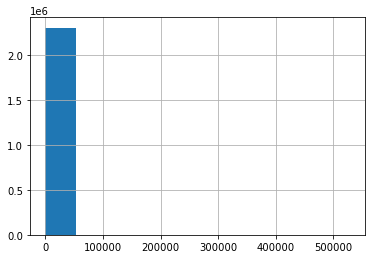

In [301]:
df['totalConsumo'].hist()

In [328]:
len(df)

1741674

In [327]:
df=df[df['totalConsumo']>0]

<AxesSubplot:>

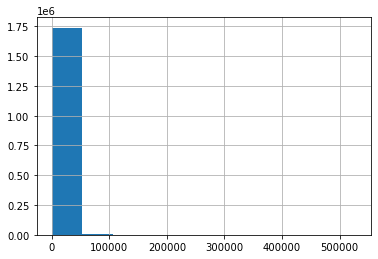

In [330]:
df['totalConsumo'].hist()

### Los metodos no lograr separar (con consumo los casos de porout de los que no)

In [403]:
#sns.violinplot(x='FECHA', y='pred', data=dfGraf, inner="quart", linewidth=1)
baseArbol.head(10)

,ws_p,tyf_p,sn_p,y_p,gm_p,POROUT,cat_Edad2
2,51.036,12.994,0.000,7.910,0.000,1,60.000
3,100.000,0.000,0.000,0.000,0.000,1,40.000
5,100.000,0.000,0.000,0.000,0.000,1,40.000
6,32.212,49.863,0.069,17.857,0.000,1,60.000
8,15.569,48.163,0.073,4.038,0.000,0,45.000
9,63.934,1.639,0.000,34.426,0.000,1,40.000
11,50.000,0.000,0.000,50.000,0.000,1,60.000
14,80.573,8.917,2.229,8.280,0.000,1,40.000
15,100.000,0.000,0.000,0.000,0.000,1,40.000
16,1.747,77.729,0.000,20.524,0.000,1,35.000


In [406]:
len(baseArbol)

1741674

In [426]:
df_porout=baseArbol.melt(id_vars=['POROUT','cat_Edad2'], var_name='var_con',value_name='value')

In [427]:
df_porout.head(3)

,POROUT,cat_Edad2,var_con,value
0,1,60.000,ws_p,51.036
1,1,40.000,ws_p,100.000
2,1,40.000,ws_p,100.000


In [428]:
df_porout['var_con'].value_counts()

inst_p    1741674
y_p       1741674
tyf_p     1741674
sn_p      1741674
gm_p      1741674
ws_p      1741674
Name: var_con, dtype: int64

<AxesSubplot:xlabel='var_con', ylabel='value'>

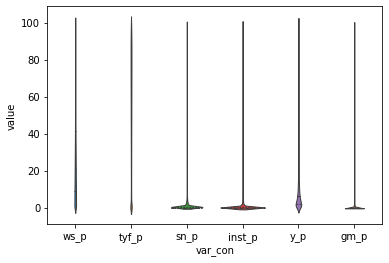

In [429]:
sns.violinplot(x='var_con', y='value', data=df_porout, inner="quart", linewidth=1)

<AxesSubplot:xlabel='var_con', ylabel='value'>

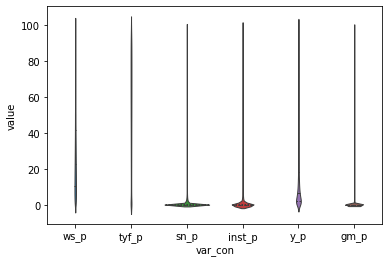

In [430]:
sns.violinplot(x='var_con', y='value', data=df_porout[df_porout['POROUT']==1], inner="quart", linewidth=1)

<AxesSubplot:xlabel='var_con', ylabel='value'>

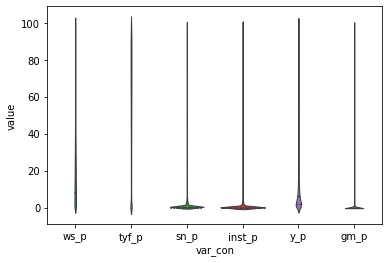

In [431]:
sns.violinplot(x='var_con', y='value', data=df_porout[df_porout['POROUT']==0], inner="quart", linewidth=1)

In [433]:
baseArbol[baseArbol['POROUT']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
ws_p,1532975.000,28.082,24.745,0.000,8.538,20.930,41.379,100.000
tyf_p,1532975.000,52.516,30.243,0.000,28.571,57.617,78.154,100.000
sn_p,1532975.000,1.222,5.091,0.000,0.000,0.040,0.472,100.000
inst_p,1532975.000,1.822,7.504,0.000,0.000,0.000,0.207,100.000
y_p,1532975.000,16.062,22.893,0.000,2.013,6.142,19.200,100.000
gm_p,1532975.000,0.296,2.985,0.000,0.000,0.000,0.000,100.000
POROUT,1532975.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
cat_Edad2,1532975.000,31.166,13.399,20.000,25.000,25.000,35.000,60.000


In [432]:
baseArbol[baseArbol['POROUT']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
ws_p,208699.000,28.995,23.486,0.000,10.654,22.671,41.689,100.000
tyf_p,208699.000,51.454,28.478,0.000,29.379,55.307,75.204,100.000
sn_p,208699.000,1.024,4.054,0.000,0.000,0.070,0.474,100.000
inst_p,208699.000,3.107,9.717,0.000,0.000,0.015,0.833,100.000
y_p,208699.000,15.025,20.308,0.000,2.381,6.610,18.493,100.000
gm_p,208699.000,0.396,3.014,0.000,0.000,0.000,0.000,100.000
POROUT,208699.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000
cat_Edad2,208699.000,33.324,12.766,20.000,25.000,25.000,40.000,60.000


## Revisión Edad

In [ ]:
###Val Por out de Ced primera fase

In [446]:
df['Edad_ced'].notnull().sum()

121896

In [455]:
df['cat_Ced_Edad2']=5*(df['Edad_ced']//5)
df['cat_Ced_Edad2']=np.where(df['cat_Ced_Edad2']>60,60,df['cat_Ced_Edad2'])
df['cat_Ced_Edad2']=np.where((df['cat_Ced_Edad2']>50)&(df['cat_Ced_Edad2']<60),50,df['cat_Ced_Edad2'])
df['cat_Ced_Edad2']=np.where((df['cat_Ced_Edad2']<20),20,df['cat_Ced_Edad2'])

In [456]:
res_total_Ced_Edad=df.groupby('cat_Ced_Edad2')['POROUT'].agg(['count','sum'])

In [464]:
res_total_Ced_Edad['indPor']=res_total_Ced_Edad['sum']/res_total_Ced_Edad['count']-0.9

In [465]:
res_total_Ced_Edad

,count,sum,indPor
cat_Ced_Edad2,,,
20.000,19066,18905,0.092
25.000,20470,20279,0.091
30.000,14526,14358,0.088
35.000,13111,12919,0.085
40.000,13287,13093,0.085
45.000,11599,11418,0.084
50.000,18363,18131,0.087
60.000,11474,11304,0.085


<AxesSubplot:ylabel='cat_Ced_Edad2'>

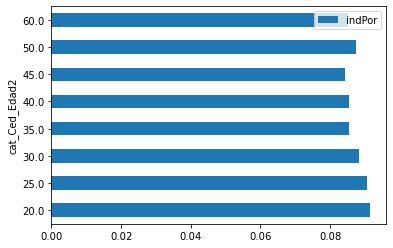

In [466]:
res_total_Ced_Edad[['indPor']].plot.barh()

In [ ]:
## Edades completas

In [351]:
df['cat_Edad2']=5*(df['EDAD']//5)

In [359]:
df['cat_Edad2']=np.where(df['cat_Edad2']>60,60,df['cat_Edad2'])

In [363]:
df['cat_Edad2']=np.where((df['cat_Edad2']>50)&(df['cat_Edad2']<60),50,df['cat_Edad2'])

In [374]:
df['cat_Edad2']=np.where((df['cat_Edad2']<20),20,df['cat_Edad2'])

In [375]:
res_total_Edad=df.groupby('cat_Edad2')['POROUT'].agg(['count','sum'])

In [376]:
5*(16.2//5)

15.0

In [377]:
res_total_Edad['indPor']=res_total_Edad['sum']/res_total_Edad['count']

In [419]:
res_total_Edad

,count,sum,indPor
cat_Edad2,,,
20.000,297758,36814,0.124
25.000,927630,72287,0.078
30.000,44900,16157,0.360
35.000,42422,14299,0.337
40.000,98870,17083,0.173
45.000,39412,12627,0.320
50.000,41537,19130,0.461
60.000,249145,20302,0.081


<AxesSubplot:ylabel='cat_Edad2'>

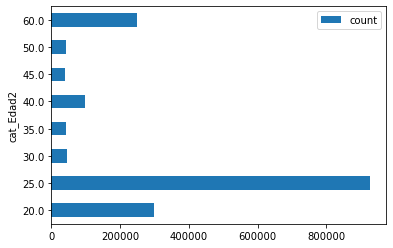

In [475]:
res_total_Edad[['count']].plot.barh()

In [ ]:
res_total_Edad[['indPor']].plot.barh()

In [379]:
res_total_Edad['sum'].sum()/res_total_Edad['count'].sum()

0.11982667250013493

####  Caracteristicas porout con

In [438]:
baseArbol[(baseArbol['POROUT']==0)&(baseArbol['cat_Edad2']==50)].describe().T

,count,mean,std,min,25%,50%,75%,max
ws_p,22407.000,25.303,27.102,0.000,3.718,12.936,45.714,100.000
tyf_p,22407.000,60.014,32.640,0.000,29.412,72.127,89.537,100.000
sn_p,22407.000,0.567,3.086,0.000,0.000,0.000,0.099,100.000
inst_p,22407.000,0.672,5.119,0.000,0.000,0.000,0.000,100.000
y_p,22407.000,13.324,16.343,0.000,2.878,8.244,16.186,100.000
gm_p,22407.000,0.120,2.051,0.000,0.000,0.000,0.000,92.605
POROUT,22407.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
cat_Edad2,22407.000,50.000,0.000,50.000,50.000,50.000,50.000,50.000


In [439]:
baseArbol[(baseArbol['POROUT']==1)&(baseArbol['cat_Edad2']==50)].describe().T

,count,mean,std,min,25%,50%,75%,max
ws_p,19130.000,30.875,25.952,0.000,9.951,23.320,46.573,100.000
tyf_p,19130.000,46.945,30.643,0.000,19.438,49.315,73.610,100.000
sn_p,19130.000,0.928,4.162,0.000,0.000,0.016,0.311,100.000
inst_p,19130.000,2.659,9.531,0.000,0.000,0.000,0.380,98.649
y_p,19130.000,18.240,22.877,0.000,2.905,8.596,23.990,100.000
gm_p,19130.000,0.352,3.193,0.000,0.000,0.000,0.000,100.000
POROUT,19130.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000
cat_Edad2,19130.000,50.000,0.000,50.000,50.000,50.000,50.000,50.000


<AxesSubplot:xlabel='var_con', ylabel='value'>

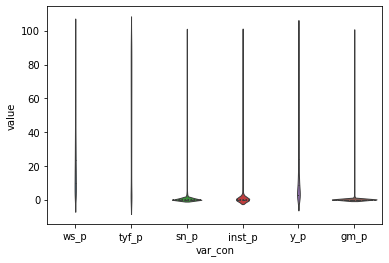

In [434]:
sns.violinplot(x='var_con', y='value', data=df_porout[(df_porout['POROUT']==1)&(df_porout['cat_Edad2']==50)], inner="quart", linewidth=1)

<AxesSubplot:xlabel='var_con', ylabel='value'>

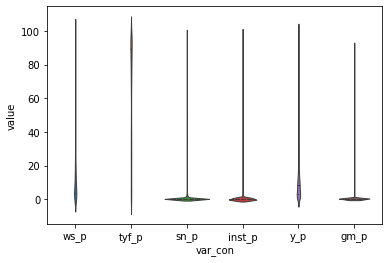

In [435]:
sns.violinplot(x='var_con', y='value', data=df_porout[(df_porout['POROUT']==0)&(df_porout['cat_Edad2']==50)], inner="quart", linewidth=1)

In [436]:
baseArbol[(baseArbol['POROUT']==0)&(baseArbol['cat_Edad2']==30)].describe().T

,count,mean,std,min,25%,50%,75%,max
ws_p,28743.000,23.443,19.841,0.000,8.743,17.472,32.381,100.000
tyf_p,28743.000,59.821,26.066,0.000,38.735,67.105,82.307,100.000
sn_p,28743.000,1.163,4.039,0.000,0.000,0.105,0.614,95.536
inst_p,28743.000,0.198,2.285,0.000,0.000,0.000,0.000,83.740
y_p,28743.000,15.152,16.408,0.000,3.145,8.037,22.109,100.000
gm_p,28743.000,0.223,2.333,0.000,0.000,0.000,0.000,97.970
POROUT,28743.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
cat_Edad2,28743.000,30.000,0.000,30.000,30.000,30.000,30.000,30.000


In [437]:
baseArbol[(baseArbol['POROUT']==1)&(baseArbol['cat_Edad2']==30)].describe().T

,count,mean,std,min,25%,50%,75%,max
ws_p,16157.000,28.563,22.472,0.000,11.116,22.374,40.741,100.000
tyf_p,16157.000,52.486,27.265,0.000,31.714,55.595,75.655,100.000
sn_p,16157.000,1.044,3.739,0.000,0.000,0.095,0.532,100.000
inst_p,16157.000,3.180,9.940,0.000,0.000,0.023,0.816,100.000
y_p,16157.000,14.329,18.316,0.000,2.532,6.863,18.403,100.000
gm_p,16157.000,0.398,3.041,0.000,0.000,0.000,0.000,96.330
POROUT,16157.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000
cat_Edad2,16157.000,30.000,0.000,30.000,30.000,30.000,30.000,30.000


In [440]:
baseArbol[(baseArbol['POROUT']==0)&(baseArbol['cat_Edad2']==35)].describe().T

,count,mean,std,min,25%,50%,75%,max
ws_p,28123.000,33.583,28.022,0.000,8.903,27.089,53.371,100.000
tyf_p,28123.000,48.132,29.817,0.000,24.137,44.914,75.708,100.000
sn_p,28123.000,1.023,4.089,0.000,0.000,0.019,0.393,100.000
inst_p,28123.000,0.032,0.492,0.000,0.000,0.000,0.000,33.824
y_p,28123.000,17.054,22.708,0.000,3.061,6.477,17.857,100.000
gm_p,28123.000,0.175,2.025,0.000,0.000,0.000,0.000,98.601
POROUT,28123.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
cat_Edad2,28123.000,35.000,0.000,35.000,35.000,35.000,35.000,35.000


In [441]:
baseArbol[(baseArbol['POROUT']==1)&(baseArbol['cat_Edad2']==35)].describe().T

,count,mean,std,min,25%,50%,75%,max
ws_p,14299.000,30.524,23.963,0.000,11.385,24.386,45.087,100.000
tyf_p,14299.000,49.802,28.172,0.000,27.527,52.262,73.333,100.000
sn_p,14299.000,1.001,3.721,0.000,0.000,0.072,0.479,86.710
inst_p,14299.000,2.870,9.358,0.000,0.000,0.000,0.598,100.000
y_p,14299.000,15.417,20.227,0.000,2.634,7.018,18.917,100.000
gm_p,14299.000,0.387,3.205,0.000,0.000,0.000,0.000,95.161
POROUT,14299.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000
cat_Edad2,14299.000,35.000,0.000,35.000,35.000,35.000,35.000,35.000


In [444]:
baseArbol[(baseArbol['POROUT']==0)&(baseArbol['cat_Edad2']==45)].describe().T

,count,mean,std,min,25%,50%,75%,max
ws_p,26785.000,18.919,20.291,0.000,5.121,11.448,24.000,100.000
tyf_p,26785.000,60.888,29.350,0.000,35.732,68.595,87.354,100.000
sn_p,26785.000,0.542,2.920,0.000,0.000,0.000,0.122,93.103
inst_p,26785.000,0.391,4.166,0.000,0.000,0.000,0.000,100.000
y_p,26785.000,19.170,24.130,0.000,2.621,7.756,26.515,100.000
gm_p,26785.000,0.090,1.510,0.000,0.000,0.000,0.000,91.241
POROUT,26785.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
cat_Edad2,26785.000,45.000,0.000,45.000,45.000,45.000,45.000,45.000


In [445]:
baseArbol[(baseArbol['POROUT']==1)&(baseArbol['cat_Edad2']==45)].describe().T

,count,mean,std,min,25%,50%,75%,max
ws_p,12627.000,29.468,24.476,0.000,10.005,22.476,43.656,100.000
tyf_p,12627.000,49.114,29.374,0.000,24.705,51.798,74.304,100.000
sn_p,12627.000,0.965,4.112,0.000,0.000,0.034,0.357,100.000
inst_p,12627.000,2.904,9.928,0.000,0.000,0.000,0.472,98.551
y_p,12627.000,17.168,22.132,0.000,2.727,7.692,21.684,100.000
gm_p,12627.000,0.381,3.433,0.000,0.000,0.000,0.000,100.000
POROUT,12627.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000
cat_Edad2,12627.000,45.000,0.000,45.000,45.000,45.000,45.000,45.000


In [520]:
df.columns.values

array(['CO_ID', 'file', 'CUSTOMER_ID', 'CUSTCODE', 'TELE_NUMB',
       'TELE_NUMB_COMPLETO', 'IDENTIFICACION', 'FECHA_ACTIVACION_BSCS',
       'POROUT', 'REGION_SIT', 'MUNICIPIO_SIT', 'DEPTO_SIT',
       'REGION_SIT_NOCHE', 'MUNICIPIO_SIT_NOCHE', 'DEPTO_SIT_NOCHE',
       'REGION_SIT_M1', 'MUNICIPIO_SIT_M1', 'DEPTO_SIT_M1',
       'REGION_SIT_NOCHE_M1', 'MUNICIPIO_SIT_NOCHE_M1',
       'DEPTO_SIT_NOCHE_M1', 'PROM_SEGUNDOS_MA', 'PROM_SEGUNDOS_M1',
       'PROM_SEGUNDOS_M2', 'PROM_SEGUNDOS_M3', 'PROM_SEGUNDOS_M4',
       'PROM_DATOS_MA', 'PROM_DATOS_M1', 'PROM_DATOS_M2', 'PROM_DATOS_M3',
       'PROM_DATOS_M4', 'CANT_SMS_MA', 'CANT_SMS_M1', 'CANT_SMS_M2',
       'CANT_SMS_M3', 'CANT_SMS_M4', 'TOTAL_MB_WHATSAPP',
       'TOTAL_MB_TWITTER_Y_FACEBOOK', 'TOTAL_MB_SNAPCHAT',
       'TOTAL_MB_INSTAGRAM', 'TOTAL_MB_WAZE', 'TOTAL_MB_YOUTUBE',
       'TOTAL_MB_SPOTIFY', 'TOTAL_MB_GOOGLE_MAPS', 'CONSUMO_TOTAL_MB',
       'CANT_PAQ_MAS_COMPRADO_MES', 'VLR_PAQ_MAS_COMPRADO_MES',
       'NOMBRE_PAQ_M

In [540]:
df[(df['POROUT']==0)&(df['DEPTO_SIT']=='Cundinamarca')][selServicios+['POROUT','cat_Edad2']].describe().T

,count,mean,std,min,25%,50%,75%,max
ws_p,270233.000,0.272,0.241,0.000,0.085,0.200,0.396,1.000
tyf_p,270233.000,0.514,0.304,0.000,0.265,0.563,0.773,1.000
sn_p,270233.000,0.011,0.046,0.000,0.000,0.000,0.004,1.000
inst_p,270233.000,0.025,0.089,0.000,0.000,0.000,0.005,1.000
y_p,270233.000,0.172,0.236,0.000,0.023,0.068,0.210,1.000
gm_p,270233.000,0.006,0.043,0.000,0.000,0.000,0.000,1.000
POROUT,270233.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
cat_Edad2,270233.000,31.140,13.654,20.000,25.000,25.000,35.000,60.000


In [541]:
df[(df['POROUT']==1)&(df['DEPTO_SIT']=='Cundinamarca')][selServicios+['POROUT','cat_Edad2']].describe().T

,count,mean,std,min,25%,50%,75%,max
ws_p,64152.000,0.272,0.226,0.000,0.100,0.209,0.385,1.000
tyf_p,64152.000,0.513,0.284,0.000,0.292,0.552,0.751,1.000
sn_p,64152.000,0.011,0.041,0.000,0.000,0.001,0.005,1.000
inst_p,64152.000,0.035,0.103,0.000,0.000,0.000,0.012,1.000
y_p,64152.000,0.162,0.209,0.000,0.028,0.075,0.204,1.000
gm_p,64152.000,0.007,0.040,0.000,0.000,0.000,0.000,1.000
POROUT,64152.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000
cat_Edad2,64152.000,33.098,12.815,20.000,25.000,25.000,40.000,60.000


In [526]:
len(df[(df['DEPTO_SIT']=='Atlantico')&(df['POROUT']==1)])/len(df[df['DEPTO_SIT']=='Atlantico'])

0.2116425016230253

In [536]:
regAtla=df[df['DEPTO_SIT']=='Atlantico']
regAtla['aplica_reg']=np.where(regAtla['ws_p']<=0.16,0,1)
#regAtla['aplica_reg']=np.where(regAtla['aplica_reg']==1,np.where(regAtla['inst_p']<1.5,0,1),0)
regAtla['aplica_reg']=np.where(regAtla['aplica_reg']==1,np.where(regAtla['y_p']<0.063,0,1),0)

<ipython-input-536-e4943a6c99ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regAtla['aplica_reg']=np.where(regAtla['ws_p']<=0.16,0,1)
<ipython-input-536-e4943a6c99ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regAtla['aplica_reg']=np.where(regAtla['aplica_reg']==1,np.where(regAtla['y_p']<0.063,0,1),0)


In [537]:
regAtla['POROUT'].sum()/len(regAtla)

0.2116425016230253

In [538]:
regAtla[regAtla['aplica_reg']==1]['POROUT'].sum()/len(regAtla[regAtla['aplica_reg']==1])

0.23314328210213187

In [539]:
regAtla[regAtla['aplica_reg']==0]['POROUT'].sum()/len(regAtla[regAtla['aplica_reg']==0])

0.20449771407389103

In [542]:
regCun=df[df['DEPTO_SIT']=='Cundinamarca']
regCun['aplica_reg']=np.where(regCun['inst_p']<=0.03,0,1)
#regCun['aplica_reg']=np.where(regCun['aplica_reg']==1,np.where(regAtla['y_p']<0.063,0,1),0)

<ipython-input-542-9b6d67b62c51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regCun['aplica_reg']=np.where(regCun['inst_p']<=0.03,0,1)


In [543]:
regCun['POROUT'].sum()/len(regCun)

0.19185071100677362

In [544]:
regCun[regCun['aplica_reg']==1]['POROUT'].sum()/len(regCun[regCun['aplica_reg']==1])

0.24268761132213137

In [545]:
regCun[regCun['aplica_reg']==0]['POROUT'].sum()/len(regCun[regCun['aplica_reg']==0])

0.18361907806495104

In [ ]:
baseArbol[(baseArbol['POROUT']==1)&(baseArbol['DEPTO_SIT']=='Atlantico')].describe().T

### Medición Reglas

In [478]:
reg1=baseArbol[baseArbol['cat_Edad2']==50]
reg1['aplica_reg']=np.where(reg1['ws_p']<=28,0,1)
reg1['aplica_reg']=np.where(reg1['aplica_reg']==1,np.where(reg1['inst_p']<1.5,0,1),0)
reg1['aplica_reg']=np.where(reg1['aplica_reg']==1,np.where(reg1['y_p']<15,0,1),0)

<ipython-input-478-48ba8a137ff9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg1['aplica_reg']=np.where(reg1['ws_p']<=28,0,1)
<ipython-input-478-48ba8a137ff9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg1['aplica_reg']=np.where(reg1['aplica_reg']==1,np.where(reg1['inst_p']<1.5,0,1),0)
<ipython-input-478-48ba8a137ff9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [479]:
reg1['POROUT'].sum()/len(reg1)

0.4605532416881335

In [483]:
reg1[reg1['aplica_reg']==1]['POROUT'].sum()/len(reg1[reg1['aplica_reg']==1])

0.5373134328358209

In [488]:
len(reg1[reg1['aplica_reg']==1])

603

In [489]:
reg1[reg1['aplica_reg']==0]['POROUT'].sum()/len(reg1[reg1['aplica_reg']==0])

0.4594224849758147

In [490]:
len(reg1[reg1['aplica_reg']==0])

40934

In [491]:
len(reg1[reg1['aplica_reg']==1])/len(reg1)

0.01451717745624383

In [481]:
reg2=baseArbol[baseArbol['cat_Edad2']==30]
reg2['aplica_reg']=np.where(reg2['ws_p']<=25,0,1)
reg2['aplica_reg']=np.where(reg2['aplica_reg']==1,np.where(reg2['inst_p']<1.5,0,1),0)
reg2['aplica_reg']=np.where(reg2['aplica_reg']==1,np.where(reg2['gm_p']<0.3,0,1),0)
reg2['POROUT'].sum()/len(reg2)

<ipython-input-481-53823c2f2c45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg2['aplica_reg']=np.where(reg2['ws_p']<=25,0,1)
<ipython-input-481-53823c2f2c45>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg2['aplica_reg']=np.where(reg2['aplica_reg']==1,np.where(reg2['inst_p']<1.5,0,1),0)
<ipython-input-481-53823c2f2c45>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

0.3598440979955457

In [485]:
reg2[reg2['aplica_reg']==1]['POROUT'].sum()/len(reg2[reg2['aplica_reg']==1])

0.890625

In [492]:
len(reg2[reg2['aplica_reg']==1])

192

In [487]:
reg2[reg2['aplica_reg']==0]['POROUT'].sum()/len(reg2[reg2['aplica_reg']==0])

0.357564641674868

In [493]:
len(reg2[reg2['aplica_reg']==0])

44708

In [482]:
reg3=baseArbol[baseArbol['cat_Edad2']==30]
reg3['aplica_reg']=np.where(reg3['tyf_p']<=49,0,1)
reg3['aplica_reg']=np.where(reg3['aplica_reg']==1,np.where(reg3['inst_p']<1,0,1),0)
reg3['aplica_reg']=np.where(reg3['aplica_reg']==1,np.where(reg3['gm_p']<0.3,0,1),0)
reg3['POROUT'].sum()/len(reg3)

<ipython-input-482-e7a690fe78ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg3['aplica_reg']=np.where(reg3['tyf_p']<=49,0,1)
<ipython-input-482-e7a690fe78ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg3['aplica_reg']=np.where(reg3['aplica_reg']==1,np.where(reg3['inst_p']<1,0,1),0)
<ipython-input-482-e7a690fe78ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

0.3598440979955457

In [497]:
reg3[reg3['aplica_reg']==1]['POROUT'].sum()/len(reg3[reg3['aplica_reg']==1])

0.9704142011834319

In [498]:
reg3[reg3['aplica_reg']==0]['POROUT'].sum()/len(reg3[reg3['aplica_reg']==0])

0.3575372783975319

In [494]:
len(reg3[reg3['aplica_reg']==1])

169

In [495]:
len(reg2[reg2['aplica_reg']==0])

44708

In [ ]:
reg4=baseArbol[baseArbol['cat_Edad2']==45]
reg4['aplica_reg']=np.where(reg4['ws_p']<=24,0,1)
reg4['aplica_reg']=np.where(reg4['aplica_reg']==1,np.where(reg4['inst_p']<1.5,0,1),0)
reg4['aplica_reg']=np.where(reg4['aplica_reg']==1,np.where(reg4['gm_p']<0.15,0,1),0)
reg4['POROUT'].sum()/len(reg4)

In [514]:
reg4=baseArbol[baseArbol['cat_Edad2']==45]
reg4['aplica_reg']=np.where(reg4['ws_p']<=10,0,1)
reg4['aplica_reg']=np.where(reg4['aplica_reg']==1,np.where(reg4['inst_p']<0.8,0,1),0)
reg4['aplica_reg']=np.where(reg4['aplica_reg']==1,np.where(reg4['gm_p']<0.08,0,1),0)
reg4['POROUT'].sum()/len(reg4)

<ipython-input-514-6437ba4263a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg4['aplica_reg']=np.where(reg4['ws_p']<=10,0,1)
<ipython-input-514-6437ba4263a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg4['aplica_reg']=np.where(reg4['aplica_reg']==1,np.where(reg4['inst_p']<0.8,0,1),0)
<ipython-input-514-6437ba4263a8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

0.3203846544199736

In [515]:
reg4[reg4['aplica_reg']==1]['POROUT'].sum()/len(reg4[reg4['aplica_reg']==1])

0.8469387755102041

In [516]:
len(reg4[reg4['aplica_reg']==1])

392

In [513]:
reg4[reg4['aplica_reg']==0]['POROUT'].sum()/len(reg4[reg4['aplica_reg']==0])

0.31643401339673777

In [503]:
len(reg4[reg4['aplica_reg']==0])

39255

In [517]:
len(reg4[reg4['aplica_reg']==1])/len(reg4)

0.00994620927636253

#### Fin  Caracteristicas porout con

In [380]:
df['cat_Edad2'].isnull().sum()

0

<AxesSubplot:xlabel='EDAD', ylabel='POROUT'>

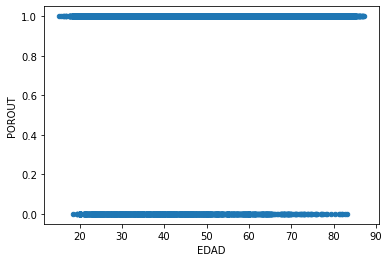

In [402]:
df.plot.scatter(x='EDAD',y='POROUT')

In [ ]:
### Regionales

## Arbol

In [331]:
selServicios=['ws_p','tyf_p','sn_p','inst_p','y_p','gm_p']

In [423]:
baseArbol=df.copy()

In [424]:
for col in selServicios:
    baseArbol[col]=baseArbol[col]*100

In [425]:
baseArbol=baseArbol[selServicios+['POROUT','cat_Edad2']]

In [394]:
def visualizarArbol(model_fit,depth):
    fig, ax = plt.subplots(figsize=(depth*10,10))
    print(f"Profundidad del árbol: {tree_model.get_depth()}")
    print(f"Número de nodos terminales: {tree_model.get_n_leaves()}")
    plot = plot_tree(
                decision_tree = tree_model,
                feature_names = baseArbol.drop(columns = "POROUT").columns,
                class_names   = ['0','POROUT'],
                filled        = True,
                impurity      = False,
                fontsize      = 10,
                precision     = 3,
                ax            = ax
           )

Profundidad del árbol: 5
Número de nodos terminales: 32


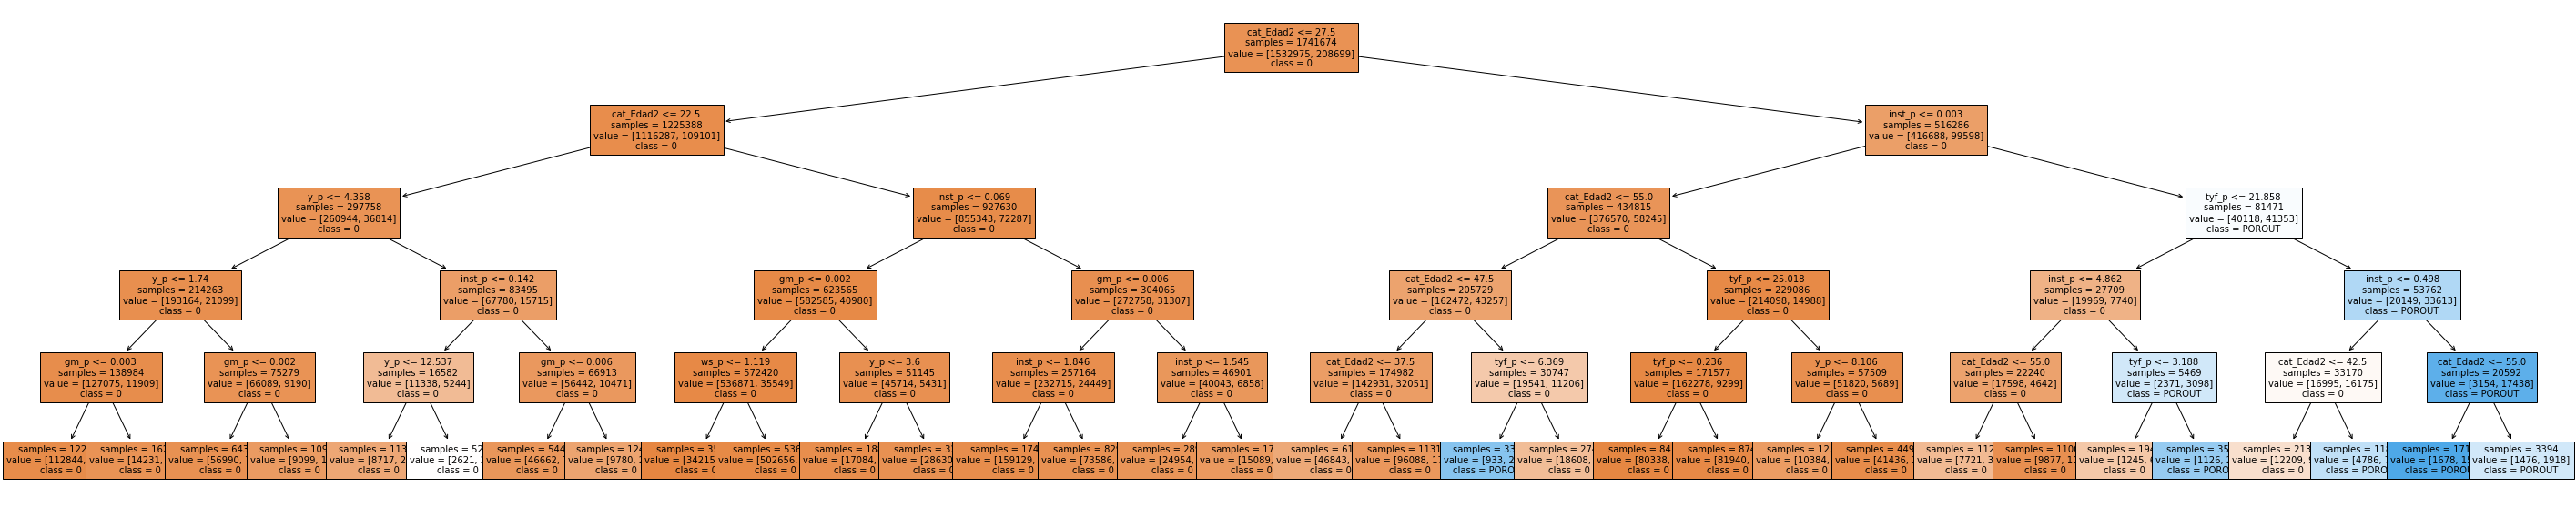

In [395]:
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5)
model_fit = tree_model.fit(X = baseArbol.drop(['POROUT'], axis=1), y = baseArbol["POROUT"])
visualizarArbol(model_fit,5)

In [387]:
## Sin instagram

In [396]:
baseArbol.drop(columns=['inst_p'],inplace=True)

Profundidad del árbol: 5
Número de nodos terminales: 32


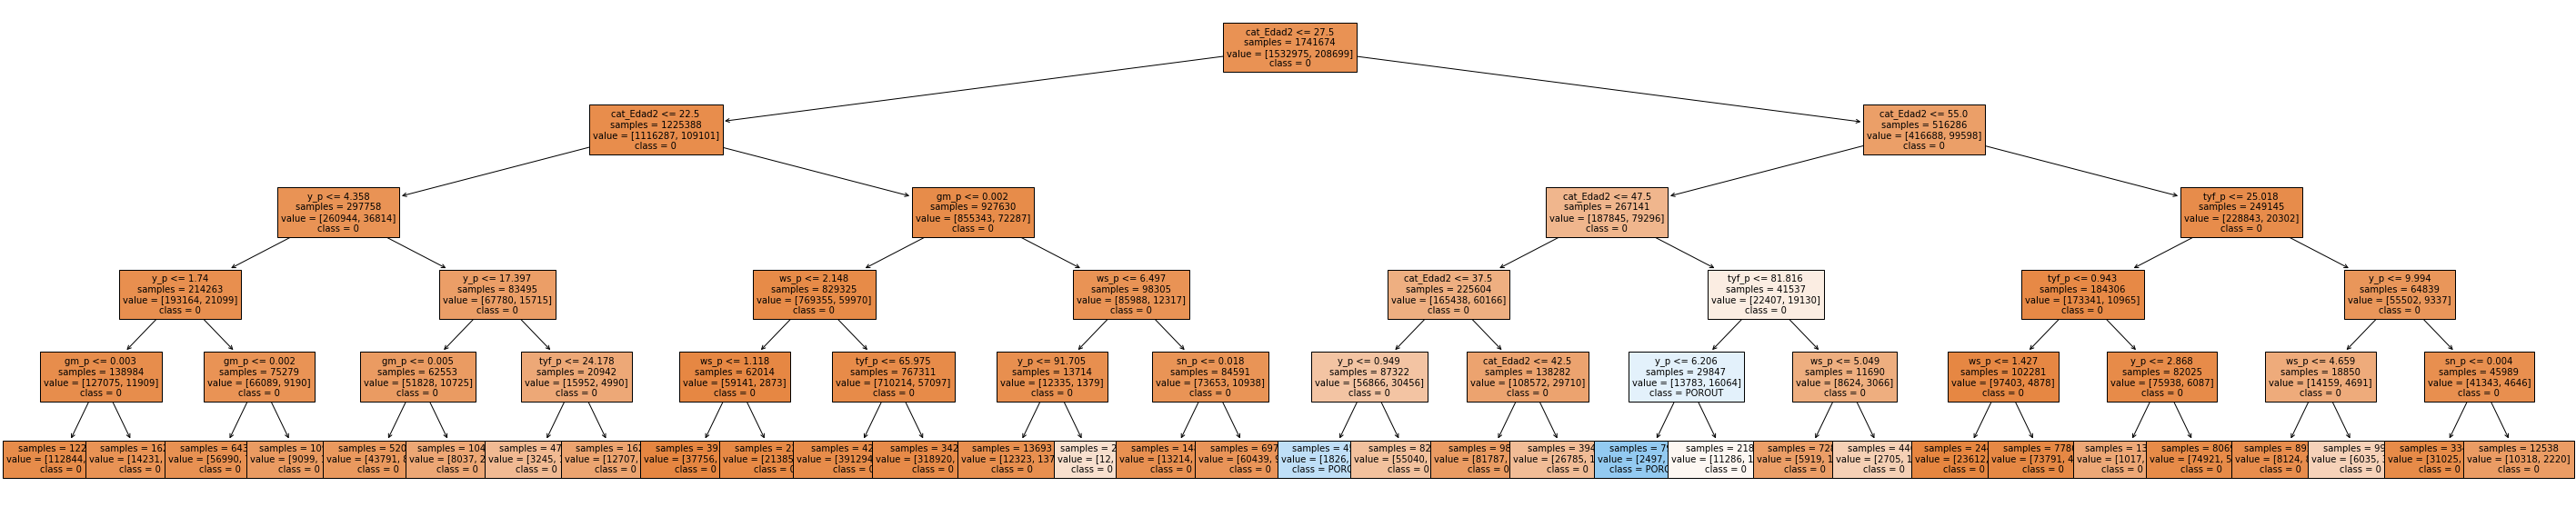

In [397]:
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5)
model_fit = tree_model.fit(X = baseArbol.drop(['POROUT'], axis=1), y = baseArbol["POROUT"])
visualizarArbol(model_fit,5)

In [401]:
# get the text representation
feature_names=list(baseArbol.drop(['POROUT'], axis=1).columns.values)
feature_names
text_representation = tree.export_text(tree_model, feature_names=feature_names,show_weights=True)
print(text_representation)

|--- cat_Edad2 <= 27.50
|   |--- cat_Edad2 <= 22.50
|   |   |--- y_p <= 4.36
|   |   |   |--- y_p <= 1.74
|   |   |   |   |--- gm_p <= 0.00
|   |   |   |   |   |--- weights: [112844.00, 9899.00] class: 0
|   |   |   |   |--- gm_p >  0.00
|   |   |   |   |   |--- weights: [14231.00, 2010.00] class: 0
|   |   |   |--- y_p >  1.74
|   |   |   |   |--- gm_p <= 0.00
|   |   |   |   |   |--- weights: [56990.00, 7310.00] class: 0
|   |   |   |   |--- gm_p >  0.00
|   |   |   |   |   |--- weights: [9099.00, 1880.00] class: 0
|   |   |--- y_p >  4.36
|   |   |   |--- y_p <= 17.40
|   |   |   |   |--- gm_p <= 0.01
|   |   |   |   |   |--- weights: [43791.00, 8276.00] class: 0
|   |   |   |   |--- gm_p >  0.01
|   |   |   |   |   |--- weights: [8037.00, 2449.00] class: 0
|   |   |   |--- y_p >  17.40
|   |   |   |   |--- tyf_p <= 24.18
|   |   |   |   |   |--- weights: [3245.00, 1467.00] class: 0
|   |   |   |   |--- tyf_p >  24.18
|   |   |   |   |   |--- weights: [12707.00, 3523.00] class: 0
| 